<a href="https://colab.research.google.com/github/melissa-aguiar/GitDesk/blob/master/Filtro_Casado_estocastico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filtro Casado Estocastivo: 

- data: 19 de Março de 2021


# Importando bibliotecas e carregando arquivos


**Passo 1:** Importando as bibliotecas do python:

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import random
import csv

# Helper libraries
import os
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import seaborn as sn

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


**Passo 2:** Importando o google drive para o google colab:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Passo 3:** Carregando o arquivo de dados:

In [ ]:
smpsinal =np.load('/content/drive/MyDrive/Filtro_casado_estocastico/SmpSinal.npy')
smpruido =np.load('/content/drive/MyDrive/Filtro_casado_estocastico/SmpRuido.npy')
EneStile=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TileModSinal.npy')
EneRtile=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TileModRuido.npy')
EneStmdb_ch=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TMDBSinalCh.npy')
EneRtmdb_ch=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TMDBRuidoCh.npy')

# Formato do conjunto de dados

In [ ]:
# [Lado][Modulo][Canal][Amostra][Pulso]
for i in range(7):
  print(smpsinal[0][0][0][i][0])  # equivale ao L0C0M0

for i in range(7):
  print(smpruido[0][0][0][i][0])  # equivale ao noiseL0C0M0


# [Lado][Modulo][Canal][Pulso]
for i in range(4):
  print(EneStmdb_ch[0][0][i][0])  # equivale ao muonMa1

for i in range(4):
  print(EneRtmdb_ch[0][0][i][0])  # equivale ao noiseMa1

# ROC Filtro Casado

Gerando os sinais antes do plot

In [ ]:
FcSinal = []
FcRuido = []

for j in range(50385):
  FcSinal.append(EneStmdb_ch[0][0][0][j] + EneStmdb_ch[0][0][1][j] + EneStmdb_ch[0][0][2][j] + EneStmdb_ch[0][0][3][j])
  FcRuido.append(EneRtmdb_ch[0][0][0][j] + EneRtmdb_ch[0][0][1][j] + EneRtmdb_ch[0][0][2][j] + EneRtmdb_ch[0][0][3][j])

Parâmetros e cálculos

In [ ]:
pmin = min(FcSinal)
pmax = max(FcSinal)
pontos = 1000

psoma = (pmax+abs(pmin))/pontos
patamar = pmin
PD = []
FA = []
pd = 0
fa = 0

for i in range(pontos):
  for j in range(len(FcRuido)):
    if FcSinal[j] > patamar:
      pd = pd + 1
    if FcRuido[j] > patamar:
      fa = fa + 1
  
  pd = pd*100/len(FcSinal)
  fa = fa*100/len(FcRuido)
  PD.append(pd)
  FA.append(fa)
  pd = 0
  fa = 0
  patamar = patamar + psoma

Plotando a curva

Text(0, 0.5, 'Probabilidade de Detecção')

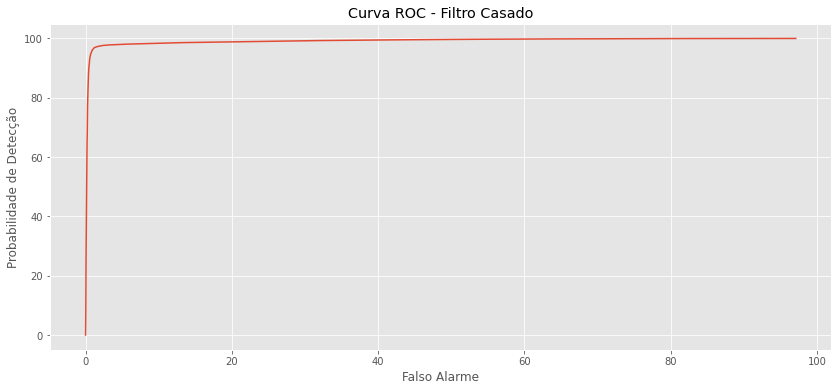

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (14, 6))
plt.plot(FA, PD)
plt.title("Curva ROC - Filtro Casado")
plt.xlabel("Falso Alarme")
plt.ylabel("Probabilidade de Detecção")


#Filtro Casado Estocástico

##Calculando o pedestal para cada canal

In [ ]:
ped0 = 0
ped1 = 0
ped2 = 0
ped3 = 0

for i in range(50385):
  ped0 = ped0 + smpruido[0][0][0][4][i]
  ped1 = ped1 + smpruido[0][0][1][4][i]
  ped2 = ped2 + smpruido[0][0][2][4][i]
  ped3 = ped3 + smpruido[0][0][3][4][i]

ped0 = ped0/50385
ped1 = ped1/50385
ped2 = ped2/50385
ped3 = ped3/50385


##Separando os dados de ruído por canal

In [ ]:
ruido0 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[0][0][0][i][j])
  ruido0.append(aux)

ruido1 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[0][0][1][i][j])
  ruido1.append(aux)

ruido2 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[0][0][2][i][j])
  ruido2.append(aux)

ruido3 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[0][0][3][i][j])
  ruido3.append(aux)


##Separando os dados de sinal por canal

In [ ]:
sinal0 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[0][0][0][i][j])
  sinal0.append(aux)

sinal1 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[0][0][1][i][j])
  sinal1.append(aux)

sinal2 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[0][0][2][i][j])
  sinal2.append(aux)

sinal3 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[0][0][3][i][j])
  sinal3.append(aux)


##Separando o conjunto de dados para treino (80%) e para teste (20%)

In [ ]:
ruidoDes0 = ruido0[0:40307][:]
ruidoTes0 = ruido0[40308:50385][:]
sinalDes0 = sinal0[0:40307][:]
sinalTes0 = sinal0[40308:50385][:]

ruidoDes1 = ruido1[0:40307][:]
ruidoTes1 = ruido1[40308:50385][:]
sinalDes1 = sinal1[0:40307][:]
sinalTes1 = sinal1[40308:50385][:]

ruidoDes2 = ruido2[0:40307][:]
ruidoTes2 = ruido2[40308:50385][:]
sinalDes2 = sinal2[0:40307][:]
sinalTes2 = sinal2[40308:50385][:]

ruidoDes3 = ruido3[0:40307][:]
ruidoTes3 = ruido3[40308:50385][:]
sinalDes3 = sinal3[0:40307][:]
sinalTes3 = sinal3[40308:50385][:]


##Retirando o pedestal do conjunto de dados de treino e de teste

In [ ]:
ruidoDes0 = ruidoDes0 - ped0
ruidoTes0 = ruidoTes0 - ped0
sinalDes0 = sinalDes0 - ped0
sinalTes0 = sinalTes0 - ped0

ruidoDes1 = ruidoDes1 - ped1
ruidoTes1 = ruidoTes1 - ped1
sinalDes1 = sinalDes1 - ped1
sinalTes1 = sinalTes1 - ped1

ruidoDes2 = ruidoDes2 - ped2
ruidoTes2 = ruidoTes2 - ped2
sinalDes2 = sinalDes2 - ped2
sinalTes2 = sinalTes2 - ped2

ruidoDes3 = ruidoDes3 - ped3
ruidoTes3 = ruidoTes3 - ped3
sinalDes3 = sinalDes3 - ped3
sinalTes3 = sinalTes3 - ped3

##Separando o conjunto de dados de treino e de teste por módulo

In [ ]:
ruidoDes = ruidoDes0 + ruidoDes1 + ruidoDes2 + ruidoDes3
ruidoTes = ruidoTes0 + ruidoTes1 + ruidoTes2 + ruidoTes3
sinalDes = sinalDes0 + sinalDes1 + sinalDes2 + sinalDes3
sinalTes = sinalTes0 + sinalTes1 + sinalTes2 + sinalTes3


##Branqueamento

In [ ]:
c = np.cov(ruidoDes, bias=True)
#sn.heatmap(covMatrix, annot=True, fmt='g')
#plt.show()